In [17]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [18]:
df = pd.read_csv(os.path.join("winequality-red.csv"))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
y = df["quality"]
# target_names = ["negative", "positive"]

In [13]:
X = df[["volatile acidity", "sulphates", "total sulfur dioxide", "alcohol"]]
X.head()

,volatile acidity,sulphates,total sulfur dioxide,alcohol
0,0.70,0.56,34.0,9.4
1,0.88,0.68,67.0,9.8
2,0.76,0.65,54.0,9.8
3,0.28,0.58,60.0,9.8
4,0.70,0.56,34.0,9.4


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.575
k: 3, Train/Test Score: 0.769/0.470
k: 5, Train/Test Score: 0.692/0.517
k: 7, Train/Test Score: 0.651/0.502
k: 9, Train/Test Score: 0.624/0.502
k: 11, Train/Test Score: 0.617/0.512
k: 13, Train/Test Score: 0.604/0.517
k: 15, Train/Test Score: 0.604/0.520
k: 17, Train/Test Score: 0.595/0.502
k: 19, Train/Test Score: 0.604/0.480


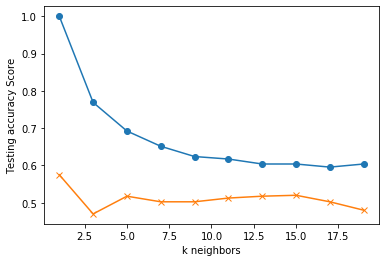

In [15]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.517
